In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib

import numpy as np                                                               
import matplotlib.pyplot as plt                                                  
import cartopy                                                                   
import sys                                                                       
import pandas as pd                                                              
import datetime as dt                                                            
import geopandas as gpd                                                          
from shapely.geometry import Polygon                                             
from cartopy.io import shapereader                                               
import cartopy.io.img_tiles as cimgt                                             
import cartopy.crs as ccrs                                                       
import geopandas                                                                 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates                                                
import matplotlib.ticker as ticker                                               
import matplotlib.ticker as mtick 
from matplotlib.ticker import FuncFormatter

#from etas.inversion import round_half_up                                          
import matplotlib.ticker as tick                                                 
import matplotlib                                                                
from matplotlib.gridspec import GridSpec  

In [2]:
font = {'family' : 'sans serif',                                                 
        'weight' : 'light',                                                      
        'size'   : 14}                                                           
                                                                                 
matplotlib.rc('font', **font)                                                    
                                                                                 
def rect_from_bound(xmin, xmax, ymin, ymax):                                     
    """Returns list of (x,y)'s for a rectangle"""                                
    xs = [xmax, xmin, xmin, xmax, xmax]                                          
    ys = [ymax, ymax, ymin, ymin, ymax]                                          
    return [(x, y) for x, y in zip(xs, ys)]     

In [3]:
# request data for use by geopandas                                              
resolution          = '10m'                                                      
category            = 'cultural'                                                 
name                = 'admin_0_countries'                                        
country             = 'Switzerland'                                              
shpfilename         = shapereader.natural_earth(resolution, category, name)      


In [4]:
shpfilename

'/Users/leila/.local/share/cartopy/shapefiles/natural_earth/cultural/ne_10m_admin_0_countries.shp'

In [5]:
df                  = geopandas.read_file(shpfilename)                           
# get geometry of a country                                                      
                                                                                 
poly = [df.loc[df['ADMIN'] == country]['geometry'].values[0]]                    
stamen_terrain              = cimgt.Stamen(                                      
    'terrain-background',                                                        
    desired_tile_form="L"                                                        
)                                                                                
# projections that involved                                                      
st_proj = stamen_terrain.crs  #projection used by Stamen images                  
ll_proj = ccrs.PlateCarree()  #CRS for raw long/lat          

In [6]:
ch_rect = np.load('../data/ch_rect.npy')    

In [7]:
import json
with open("../data/plot_forecast_data.json") as f:
    fc_data = json.load(f)
    
with open("../data/plot_train_data.json") as f:
    tr_data = json.load(f)

In [8]:
mean = pd.Series({d['index']: d['mean'] for d in fc_data})
qt_5 = pd.Series({d['index']: d['qt_5'] for d in fc_data})
qt_95 = pd.Series({d['index']: d['qt_95'] for d in fc_data})
qt_50 = pd.Series({d['index']: d['qt_50'] for d in fc_data})

mean_fake = pd.Series({d['index']: d['mean_fake'] for d in fc_data})
qt_5_fake = pd.Series({d['index']: d['qt_5_fake'] for d in fc_data})
qt_95_fake = pd.Series({d['index']: d['qt_95_fake'] for d in fc_data})
qt_50_fake = pd.Series({d['index']: d['qt_50_fake'] for d in fc_data})

obs_count = pd.Series({d['index']: d['count'] for d in tr_data})

for ser in [mean, qt_5, qt_50, qt_95, mean_fake, qt_5_fake, qt_50_fake, qt_95_fake, obs_count]:
    ser.index = pd.to_datetime(ser.index) + dt.timedelta(hours=12)
    
obs_count.iloc[-1] += 1

In [9]:
as_of = dt.datetime(2023, 2, 23)

In [10]:
truth = pd.read_csv("../data/ch_cat_uptodate.csv", index_col=0, parse_dates=['time'])

In [11]:
stdt = obs_count.index[0] - dt.timedelta(hours=12)

truth.query("time >= @stdt", inplace=True)

In [12]:
event = truth.iloc[-1, :]
event.magnitude = 5.4
event.latitude = 47.55
event.longitude = 7.60
event.time = as_of - dt.timedelta(minutes=3)
print('adding sceenario event')
print(event)

truth = \
    truth.append(event)

adding sceenario event
latitude                    47.55
longitude                     7.6
depth                        -0.4
magnitude                     5.4
time          2023-02-22 23:57:00
mc_current                    2.3
Name: 1568, dtype: object


/var/folders/pk/wyyw2scd5hv463bc0ttcc9cr0000gn/T/ipykernel_82091/1669420508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event.magnitude = 5.4
/var/folders/pk/wyyw2scd5hv463bc0ttcc9cr0000gn/T/ipykernel_82091/1669420508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event.latitude = 47.55
/var/folders/pk/wyyw2scd5hv463bc0ttcc9cr0000gn/T/ipykernel_82091/1669420508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event.long

In [13]:
a = [[1],[1, 2],[1, 2, 3],[1, 2, 3, 4], [1, 2, 3, 4]]

pd.DataFrame(a).fillna(0)

0    1    2    3
0  1  0.0  0.0  0.0
1  1  2.0  0.0  0.0
2  1  2.0  3.0  0.0
3  1  2.0  3.0  4.0
4  1  2.0  3.0  4.0

In [14]:
col_bars = '#393E41'  # '#a7adb2'                                      
col_forecast = '#00ADB5' # '#FFA07A'  # '#798280'                                
col_dots = '#F5DF4D'  # '#0066CC' #'xkcd:ruby' 

In [15]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [16]:
recti = Polygon(np.flip(ch_rect))
pad1 = 0.0  #padding, degrees unit                                               
exts = [recti.bounds[0] - pad1, recti.bounds[2] + pad1, recti.bounds[1] - pad1, recti.bounds[3] + pad1];

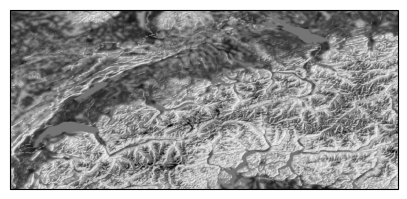

In [17]:
# request data for use by geopandas
resol          = '10m'
category            = 'cultural'
name                = 'admin_0_countries'
country             = 'Switzerland'
shpfilename         = shapereader.natural_earth(resol, category, name)
df                  = geopandas.read_file(shpfilename)
# get geometry of a country

stamen_terrain              = cimgt.Stamen(
    'terrain-background', 
    desired_tile_form="L"
)
# projections that involved
st_proj = stamen_terrain.crs  #projection used by Stamen images
ll_proj = ccrs.PlateCarree()  #CRS for raw long/lat


fig = plt.figure(figsize=(5, 5), linewidth=1, dpi=100)
ax = fig.add_subplot(111, projection=ll_proj)
pad1 = 0.0  #padding, degrees unit
ax.set_extent(exts, crs=ll_proj)



plt.set_cmap('Greys')
bg = ax.add_image(stamen_terrain, 8) 
res = fig.gca()

In [18]:
bg_img = res.get_images()[0].get_array()[::-1,:]

In [19]:
from catalog_tools import dot_size
truth['dot_size'] = dot_size(
    truth["magnitude"], 
    smallest=100,
    largest=800, 
    interpolation_power=3
)

NameError: name 'sns' is not defined

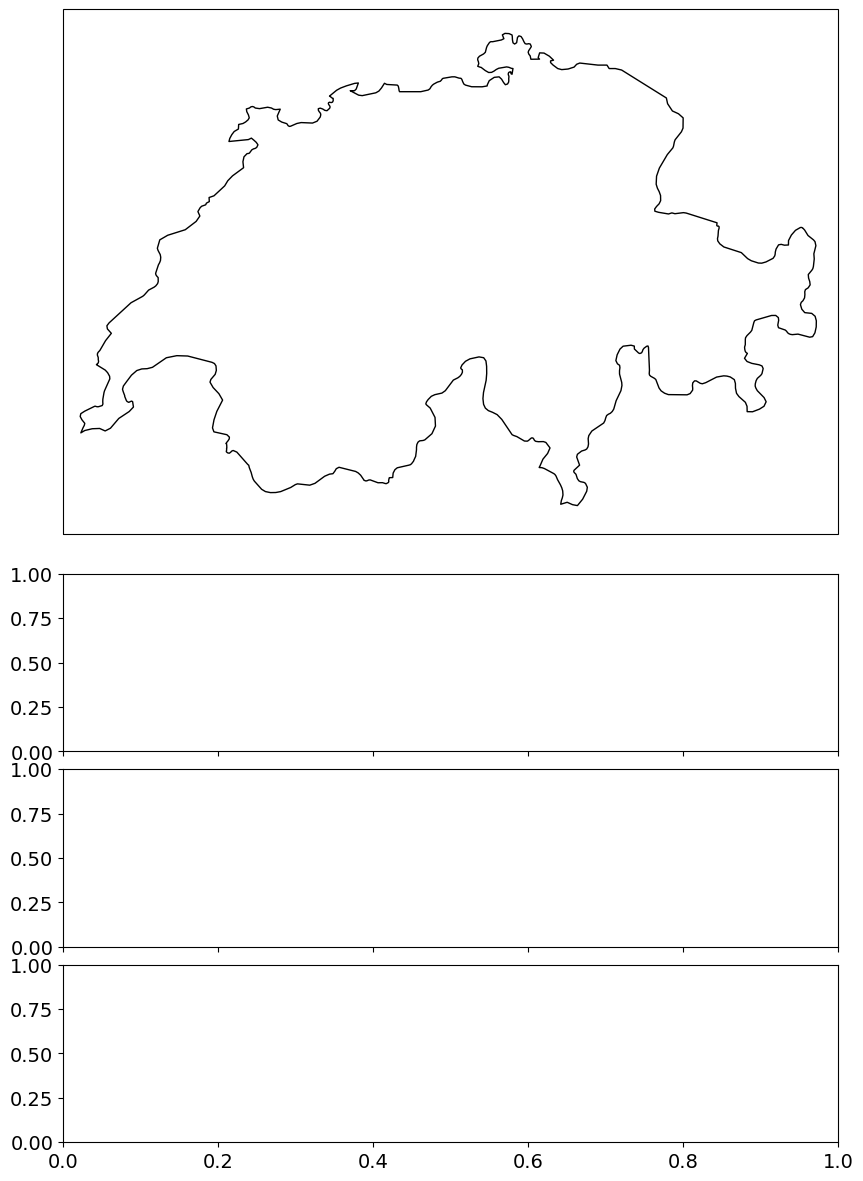

In [22]:
fig = plt.figure(figsize=(10, 15), linewidth=1)                                  
                                                                                 
plt.set_cmap('Greys')                                                            
ax = {}                                                                          
                                                                                 
height_ratios=[1, 1, 1, 1, 1, 1]                                                     
wspace=0.8                                                                       
                                                                                                                                                               
gs2 = GridSpec(                                                                  
    nrows=6, ncols=4,                                                            
    height_ratios=height_ratios,                                                 
    width_ratios=[1, 1, 1, 1],                                                
    hspace=0.1, wspace=wspace                                                    
)                         

ax['a'] = plt.subplot(gs2[:3,:4], projection=st_proj)                                                                                                             
ax['b'] = plt.subplot(gs2[3,:4])
ax['c'] = plt.subplot(gs2[4,:4], sharex=ax['b'])
ax['d'] = plt.subplot(gs2[5,:4], sharex=ax['b'])
                                                                                 
plt.rcParams["figure.autolayout"] = False                                        
plt.subplots_adjust(hspace=0.4)                                                  
plt.subplots_adjust(wspace=0.3)                                                  
                                                                                                                                                             
                 
plt.setp(ax['b'].get_xticklabels(), visible=False)
plt.setp(ax['c'].get_xticklabels(), visible=False)
                                                                                 

ax['a'].projection = st_proj                                                     
ax['a'].add_geometries(poly, crs=ll_proj, facecolor='none', edgecolor='k', zorder=13)
                                                                              

recti = Polygon(np.flip(ch_rect))
pad1 = 0.0  #padding, degrees unit                                               
exts = [recti.bounds[0] - pad1, recti.bounds[2] + pad1, recti.bounds[1] - pad1, recti.bounds[3] + pad1];
ax['a'].set_extent(exts, crs=ll_proj)                                            
                                                                                 
                                                                                 
msk = Polygon(rect_from_bound(*exts)).difference(poly[0].simplify(0.01) )        
msk_stm  = st_proj.project_geometry (msk, ll_proj)                                                   

ax['a'].imshow(
    bg_img, 
    extent=exts, 
    #vmin=100, vmax=255, 
    #alpha=0.6, 
    cmap=sns.dark_palette(
        '#7B868C',
        #list(sns.diverging_palette(15, 245))[-1], 
        (0.5, 0.5, 0.6),
        as_cmap=True, reverse=False
    ),
    transform=ccrs.PlateCarree(), 
)
ax['a'].axis('off')
ax['a'].add_geometries( msk_stm, st_proj, zorder=12, facecolor='white', edgecolor='none', alpha=0.65)    


ax['a'].scatter(                                                                 
    truth.longitude,                                                              
    truth.latitude,                                                               
    c=col_dots,                                                                    
    edgecolor='k',                                                               
    s=truth.dot_size,                                                 
    zorder=100,                                                                  
    transform=ccrs.PlateCarree(),                                                
    linewidth=0.5, alpha=0.8,
    label='observed earthquakes\nin the past 7 days'
)
ax['a'].legend(fancybox=False, loc='upper left').set_zorder(20)


# ax['b2'] = plt.twinx(ax['b'])
ax['b'].scatter(                                                                 
    truth.time,                                                              
    truth.magnitude,                                                               
    c=col_dots,                                                                    
    edgecolor='k',                                                               
    s=truth.dot_size,                                                 
    zorder=100,                                                                                          
    linewidth=0.5, alpha=0.8,
    
)

ax['b'].set_ylabel('Magnitude')
#ax['b'].scatter(mean.index, mean_fake)
ax['b'].set_ylim(2.25, 6.0)

ax['c'].bar(obs_count.index, obs_count, color=col_bars, label='observed number')
ax['c'].set_ylabel('Number of M≥2.3\nearthquakes')
(_, caps, _) = ax['c'].errorbar(
                mean_fake.index,
                qt_50_fake,
                yerr=[qt_50_fake - qt_5_fake, qt_95_fake - qt_50_fake],
                capsize=5, ecolor='k', linewidth=1, color='none',
                mfc=col_bars, ms=7, marker='D', mec='w',
                label=r'forecast with 90% confidence interval', 
)
ax['c'].legend()


capi = 0                                                             
for cap in caps:                                                     
    # cap.set_color('red')                                           
    if capi % 2 == 0:                                                
        cap.set_markeredgewidth(3)                                   
    capi += 1
                

beta = np.log(10) * 1.05
ax['d'].plot(
    mean.index, 1 - np.power(1 - np.exp(-beta * (2.5-2.3)), mean_fake),
    c=col_bars, # s=50, marker='D', ec='w',
    label='M≥2.5',
    marker='.'
)
ax['d'].plot(
    mean.index, [1 - np.power(1 - np.exp(-beta * (2.5-2.3)), mean.mean())] * len(mean),
    c=col_bars, # s=50, marker='D', ec='w',
    label='BG',
    marker='none', linewidth=1
)

ax['d'].plot(
    mean.index, 1 - np.power(1 - np.exp(-beta * (5.0-2.3)), mean_fake),
    c=col_forecast, # s=50, marker='D', ec='w',
    label='M≥5.0',
    marker='.'
)
ax['d'].plot(
    mean.index, [1 - np.power(1 - np.exp(-beta * (5.0-2.3)), mean.mean())] * len(mean),
    c=col_forecast, # s=50, marker='D', ec='w',
    label='BG',
    marker='none', linewidth=1
)

ax['d'].legend(loc='upper left', frameon=False)

ax['d'].set_yscale("log")
ax['d'].set_ylabel('Daily Earthquake\nProbability')

ax['d'].tick_params(axis='x', rotation=45, labelsize=16)                      
ax['d'].set_xlabel("Time")                                                    
# Set the xticklabels format                                             
xfmt = mdates.DateFormatter(                                             
    "%d.%m.")  # .DateFormatter("%d.%m.\n%H:%M")                         
ax['d'].xaxis.set_major_formatter(xfmt)
def y_fmt(y, pos):
    if 100 * y >= 1:
        return f"{100*y:.0f}%"
    elif y < 1:
        return f"{100*y:.2}%"

#ax['c'].set_ylim(0.00007, 1.01)
ax['d'].yaxis.set_major_formatter(FuncFormatter(y_fmt))   
ax['d'].set_yticks([0.0001, 0.001, 0.01, 0.1, 1.0])

for panel in ['b', 'c', 'd']:                                                    
    ax[panel].axvline(dt.datetime(2023, 2, 23), linestyle='--', color=col_bars, linewidth=1)  
    ymin, ymax = ax[panel].get_ylim()
    ymid = ymin + (ymax - ymin)/2
    if panel == 'd':
        ymid = ymin * np.power(ymax / ymin, 1/2)
    if panel == 'd':
        ax[panel].text(
            dt.datetime(2023, 2, 23), ymid, 'forecast date', rotation=90,
            ha='right', va='center', fontsize=10
        )
                                                                           
#ax['b2'].spines['right'].set_color(col_dots)  
#ax['b2'].spines['right'].set_linewidth(2)  

#plt.savefig('../plots/ch_forecast.png', bbox_inches='tight', dpi=100)